# 5000 películas de IMD (The Internet Movie Database)

En este proyecto nos enfocaremos en el análisis exploratorio de datos de un dataset de 5000 películas obtenidas de la base de datos de [Internet Movie Database](https://www.imdb.com).

El objetivo de este ejercicio es poner en práctica varias de las técnicas vistas en Pandas a lo largo de la parte 2 del curso y ver como obtener métricas y visualizaciones interesantes con este dataset. Hay que tener en cuenta que es un dataset que tiene información que puede ser incorrecta, incompleta, o directamente errónea, pero esto nos acerca a lo que se enfrenta de forma muy habitual un Data Scientist.


## Índice

- [Obtención de los datos](#Obtenci%C3%B3n-de-los-datos)
    - [Los imports](#Los-imports)
- [Datos](#Datos)
- [Rentabilidad por director y año](#Rentabilidad-por-director-y-a%C3%B1o)
- [Directores y críticas](#Directores-y-cr%C3%ADticas)
- [Rentabilidades por país y año](#Rentabilidades-por-pa%C3%ADs-y-a%C3%B1o)
- [Ratio de críticas](#Ratio-de-cr%C3%ADticass)
- [Películas por género](#Pel%C3%ADculas-por-g%C3%A9nero)
- [Correlaciones](#Correlaciones)
- [Palabras clave en la trama o argumento](#Palabras-clave-en-la-trama-o-argumento)

    

## Obtención de los datos

Este dataset lo podemos obtener de la página de [Kaggle directamente](https://www.kaggle.com/tmdb/tmdb-movie-metadata/downloads/tmdb_5000_movies.csv) o accediendo al fichero que se encuentra en el mismo lugar que este notebook.


Primero, debemos comenzar con los import apropiados, que ya hemos visto muchas veces.

Nota: Hemos usado el fichero original de IMDB pero por temas de Copyright deberíamos usar el de [TMDB](https://www.themoviedb.org/?language=es). Para el ámbito de este ejercicio no ocurre nada por hacerlo, pero en una aplicación real deberíamos usar el fichero de TMDB y no el de IMDB.

### Los imports

Aqui están

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

## Datos

Vamos a cargar el dataset de películas y obtener primero una descripción general del mismo. Carguemos el dataset primero.


Muestra el tipo de columnas y el head del dataset

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Rentabilidad por director y año

** Obten las diferencias entre el presupuesto de las películas y los ingresos en taquilla, la columna `gross`, añadiendo una nueva columna que se llame `diff_gross` **

** Muestra la diferencia entre presupuesto y total de taquilla por director de forma anual. El primer paso será limpiar los datos, ya que es posible que no todos las filas de la nueva columna tengas datos. Crea otro dataframe para no sobreescribir el original.**

** Agrupa el dataframe por director de película y realizando la suma de total la columna `diff_gross` y ordenalo de forma descendente**

director_name
Steven Spielberg    2.486332e+09
George Lucas        1.386641e+09
James Cameron       1.199626e+09
Joss Whedon         1.000887e+09
Chris Columbus      9.417076e+08
Name: diff_gross, dtype: float64

** Utilizando el [método](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) `pivot_table`, crea un dataframe que tenga la relación de los 20 directores que mayor beneficio han obtenido a lo largo de los años en sus películas (estos son aquellos con mayor *diff_gross*).**


**Pista 1: Igual tienes que primero obtener un índice para pasarselo a esta función. **

**Pista 2: Para comprobar si una fila tiene un director que esta en el índice creado, acúerdate que puedes usar el [método](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isin.html) `isin` de pandas**

diff_gross                                                  \
director_name Andrew Adamson Chris Columbus Christopher Nolan Clint Eastwood   
title_year                                                                     
2007.0                   NaN            NaN               NaN            NaN   
2008.0           -83385977.0            NaN       348316061.0     95793082.0   
2009.0                   NaN     -3206096.0               NaN    -22520222.0   
2010.0                   NaN     -6238280.0       132568851.0    -17258404.0   
2011.0                   NaN            NaN               NaN      2304950.0   
2012.0                   NaN            NaN       198130642.0            NaN   
2013.0                   NaN            NaN               NaN            NaN   
2014.0                   NaN            NaN        22991439.0    298357825.0   
2015.0                   NaN     -9252415.0               NaN            NaN   
2016.0                   NaN            NaN               NaN            NaN   

                                                                           \
director_name Colin Trevorrow Francis Lawrence George Lucas James Cameron   
title_year                                                                  
2007.0                    NaN      106386216.0          NaN           NaN   
2008.0                    NaN              NaN          NaN           NaN   
2009.0                    NaN              NaN          NaN   523505847.0   
2010.0                    NaN              NaN          NaN           NaN   
2011.0                    NaN       20700247.0          NaN           NaN   
2012.0              3257792.0              NaN          NaN           NaN   
2013.0                    NaN      294645577.0          NaN           NaN   
2014.0                    NaN      212103873.0          NaN           NaN   
2015.0            502177271.0      121666058.0          NaN           NaN   
2016.0                    NaN              NaN          NaN           NaN   

                                                                               \
director_name    James Wan  Jay Roach John Lasseter  Jon Favreau  Joss Whedon   
title_year                                                                      
2007.0         -10474724.0        NaN           NaN          NaN          NaN   
2008.0                 NaN        NaN           NaN  178298180.0          NaN   
2009.0                 NaN        NaN           NaN          NaN          NaN   
2010.0          52491137.0        NaN           NaN  112057433.0          NaN   
2011.0                 NaN        NaN    -8549125.0          NaN          NaN   
2012.0                 NaN -8102818.0           NaN          NaN  806559094.0   
2013.0         195962103.0        NaN           NaN          NaN          NaN   
2014.0                 NaN        NaN           NaN          NaN          NaN   
2015.0         160034110.0        NaN           NaN          NaN  208991599.0   
2016.0          62310175.0        NaN           NaN  375290282.0          NaN   

                                                                       \
director_name  Michael Bay Peter Jackson Robert Zemeckis    Sam Raimi   
title_year                                                              
2007.0         168759914.0           NaN     -67838031.0  157060606.0   
2008.0                 NaN           NaN             NaN          NaN   
2009.0         202076689.0   -42034316.0     -62149904.0   12057340.0   
2010.0                 NaN           NaN             NaN          NaN   
2011.0         157358779.0           NaN             NaN          NaN   
2012.0                 NaN           NaN      62749203.0          NaN   
2013.0          23874933.0    33355354.0             NaN   39806152.0   
2014.0          35428137.0     5108370.0             NaN          NaN   
2015.0                 NaN           NaN     -24862498.0          NaN   
2016.0           2822418.0           NaN     

** Crea un mapa de calor en el que se muestre en el eje X los años y en el eje Y los directores y con los valores de la columna diff_gross (el DataFrame obtenido en el ejercicio anterior en modo pivot_table te ayudara).** 

**Pista: Intenta user la [función](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html) `subplots` para determinar el tamaño del heatmap, pero si no lo consigues no pasa nada**

Text(0.5,69,'Nombre director')

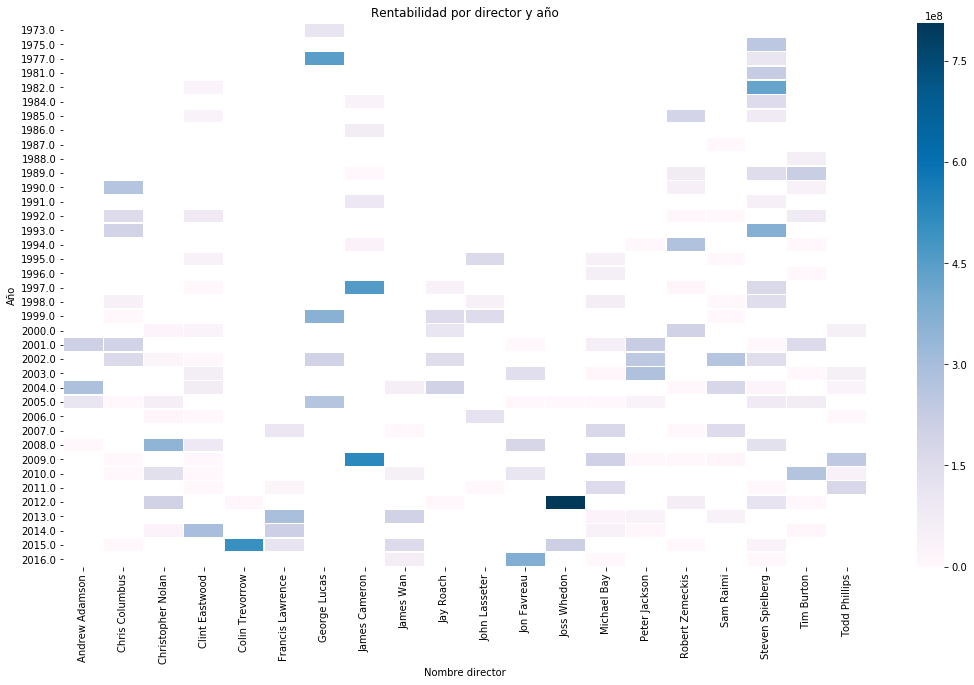

# Directores y críticas

**Vamos a realizar una visualización de los mejores directores en bases a las mejores reviews obtenidas.**

**Utilizando el dataframe sin valores nulos, agrupa usando la función `group_by` los directores que han obtenido mayor numero de criticas (a mayor el número, mejores son las críticas). Pista: Usa la columna `num_critic_for_reviews` para esto.**


director_name
Steven Spielberg     6526.0
Ridley Scott         4930.0
Tim Burton           4200.0
Clint Eastwood       4172.0
Christopher Nolan    4090.0
Name: num_critic_for_reviews, dtype: float64

** Como hizimos antes, crea un índice con los 20 primero directores con mejores críticas** 

** Crea un gráfico de barras que nos permita visualizar las críticas de mayor a menor por director. Ten en cuenta que debes usar el método `barplot` que utiliza dos ejes, el eje Y serán los directores, mientras que el Y debe ser el total de críticas recibididas por ese director.** 


**Pista: Este valor lo puedes obtener directamente del dataframe `director_critic_counts` accediendo al atributo `values` **

**Otra pista: Si tienes problemas para reprentar el eje X al superponerse los nombres, prueba a usar el [método](https://matplotlib.org/api/_as_gen/matplotlib.artist.setp.html) `setp` de matplotlib para cambiar la orientación 90 grados de las etiquetas de los directores**

Text(0.5,0,'Nombre director')

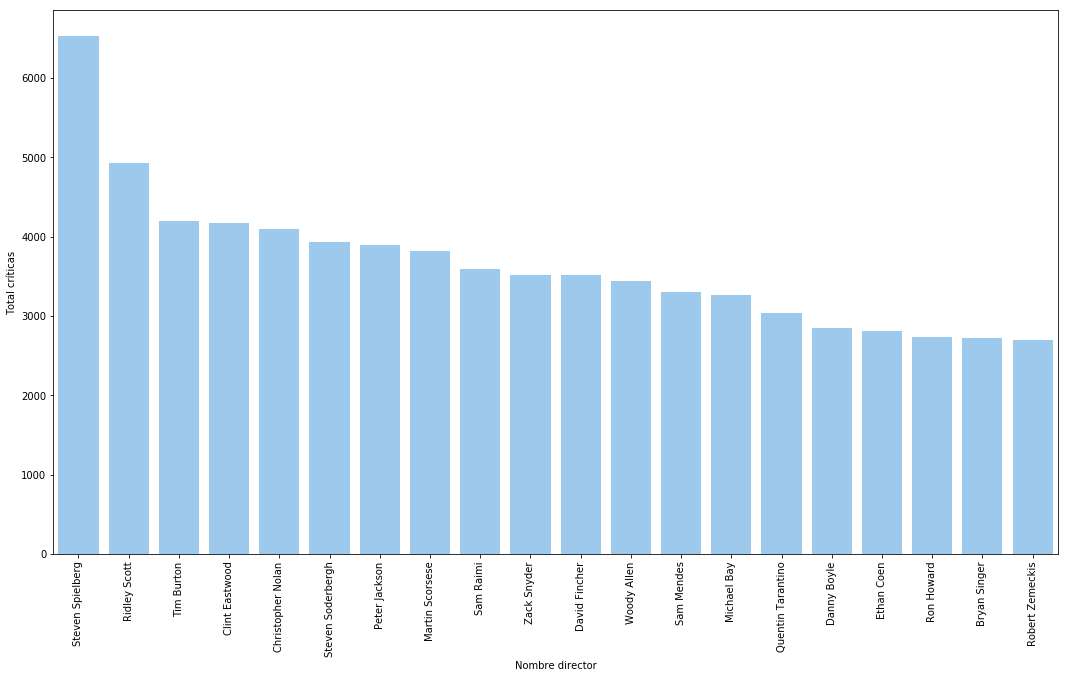

## Rentabilidades por país y año

**Veámos cuales son las rentabilidades, la columna que ya hemos obtenido anteriormente por año y país.**

**Como hemos hecho anteriormente, debes agrupar por país y agregrando la columna `diff_gross`. Crea un dataframe nuevo usando el [método](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) `group_by` y el [método](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html) `sum` para obtener este dataframe**

country
USA            5.279271e+10
UK             1.574370e+09
New Zealand    2.451598e+08
Canada         2.185933e+08
Australia      2.066683e+08
Name: diff_gross, dtype: float64

** Crea un índice como hemos hecho antes y utiliza de nuevo el método `pivot_table` para realizar la agregación de los 20 países que mas rentabilidad obtenían por sus países **

diff_gross                                                      \
country    Afghanistan Argentina Australia Canada Colombia Finland Iceland   
title_year                                                                   
1929.0             NaN       NaN       NaN    NaN      NaN     NaN     NaN   
1933.0             NaN       NaN       NaN    NaN      NaN     NaN     NaN   
1935.0             NaN       NaN       NaN    NaN      NaN     NaN     NaN   
1936.0             NaN       NaN       NaN    NaN      NaN     NaN     NaN   
1937.0             NaN       NaN       NaN    NaN      NaN     NaN     NaN   

                                                                          \
country    Indonesia Israel Mexico New Zealand Official site Peru Poland   
title_year                                                                 
1929.0           NaN    NaN    NaN         NaN           NaN  NaN    NaN   
1933.0           NaN    NaN    NaN         NaN           NaN  NaN    NaN   
1935.0           NaN    NaN    NaN         NaN           NaN  NaN    NaN   
1936.0           NaN    NaN    NaN         NaN           NaN  NaN    NaN   
1937.0           NaN    NaN    NaN         NaN           NaN  NaN    NaN   

                                                                      
country    Romania South Africa Taiwan  UK          USA West Germany  
title_year                                                            
1929.0         NaN          NaN    NaN NaN    2429000.0          NaN  
1933.0         NaN          NaN    NaN NaN    1861000.0          NaN  
1935.0         NaN          NaN    NaN NaN    2391000.0          NaN  
1936.0         NaN          NaN    NaN NaN   -1336755.0          NaN  
1937.0         NaN          NaN    NaN NaN  182925485.0          NaN

** Crea un mapa de calor  que permita visualizar la rentabilidad por país y año. Como en los casos anteriores, igual tienes que rotar las etiquetas de eje Y  para que no se solapen. Utiliza el dataframe creado en el paso anterior como fuente de datos**

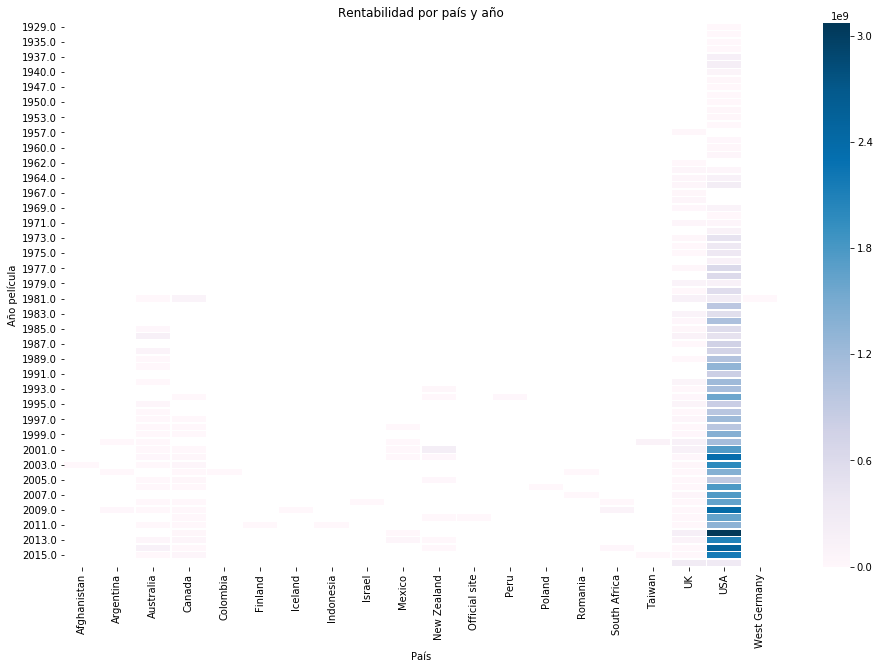

## Ratio de críticas

** IMDB es conocido por la desproporción a veces entre la valoración de los críticos profesionales y a de los usuarios de la plataforma, valores altos significan que la crítica profesional valora más la pelicula y viceversa. Obtén este ratio y añadelo en una nueva columna llamada `critic_ratio`. Utiliza como fuente el dataframe sin datos vacíos **

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,diff_gross,critic_ratio
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,0.236739
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,0.243942
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,0.605634
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,0.301000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,0.626016


**Obtén el listado de directores con la media del ratio de críticas. Como siempre, crea un nuevo dataframe y con este crea un índice. Obtén aquellos con un mayor ratio solamente, los 20 primeros**

director_name
Karim Aïnouz          7.000000
Hans Canosa           6.759259
Hitoshi Matsumoto     6.000000
Joseph Dorman         5.800000
Benjamin Dickinson    5.142857
Name: critic_ratio, dtype: float64

**Una vez más, pivota los datos usando `pivot_tables` de tal forma que podamos mostrar los datos anteriores utilizando un mapa de calor**

Text(0.5,68.5,'Director')

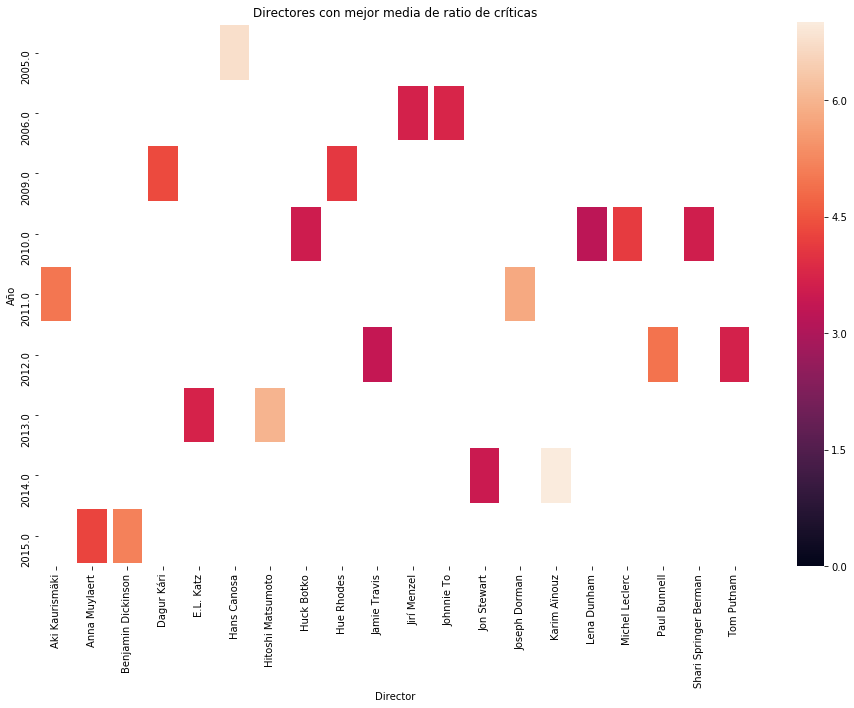

## Películas por género

** Vamos a ver cuantas películas se han realizado por género. Ten en cuenta que una misma película puede pertener a varios géneros a la vez. Además si te fijas en la columna `genres` del dataframe sin valores vaciós, verás que tiene los géneros separados por el simbolo "|". Debemos por lo tanto crear una función que traduzca ese campo a una lista de generos. **

** Añade una nueva columna que se llame `genre_list` que sea el resultado de convertir la columna `genres` a una lista de géneros**

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,diff_gross,critic_ratio,genre_list
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,0.236739,"[Action, Adventure, Fantasy, Sci-Fi]"
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,0.243942,"[Action, Adventure, Fantasy]"
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,0.605634,"[Action, Adventure, Thriller]"
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,0.301000,"[Action, Thriller]"
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,0.626016,"[Action, Adventure, Sci-Fi]"


** Una vez hecho esto debes obtener la lista de todos los generos, recorriendo el dataframe anterior y obteniendolos de la columna `genre_list`.**

** Pista 1: Deberás resetear el index con el [método](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html) `reset_index`**

** Pista 2: Crea una lista que tenga todas las listas dentro de cada fila del dataset.**

** Pista 3: Una vez tengas la lista con todos los generos de cada película, evidentemente hay muchas repeticiones. Usa la clase [Counter](https://pymotw.com/2/collections/counter.html) del módulo collections para crear un diccionario que tiene como claves los nómbres de los géneros y como valor el número de veces que aparecía en este lista**

** Pista 4: Una vez tengas el diccionario, puedes utilizar el [metodo de numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.asarray.html) `asarray` para convertir las claves y los valores de ese diccionario a arrays numpy.**

['Action' 'Adventure' 'Fantasy' 'Sci-Fi' 'Thriller' 'Romance' 'Animation'
 'Comedy' 'Family' 'Musical' 'Mystery' 'Western' 'Drama' 'History' 'Sport'
 'Crime' 'Horror' 'War' 'Biography' 'Music' 'Documentary' 'Film-Noir']
[ 959  781  507  496 1117  859  196 1461  442   96  384   59 1893  149
  148  709  392  152  239  151   45    1]


**Crea un gráfico de barras en el que se muestra los géneros en el eje X y el total de películas en el eje Y, ten en cuenta que necesitarás los array numpy que has creado en el paso anterior para pasarselos al [método](https://seaborn.pydata.org/generated/seaborn.barplot.html) `barplot`**

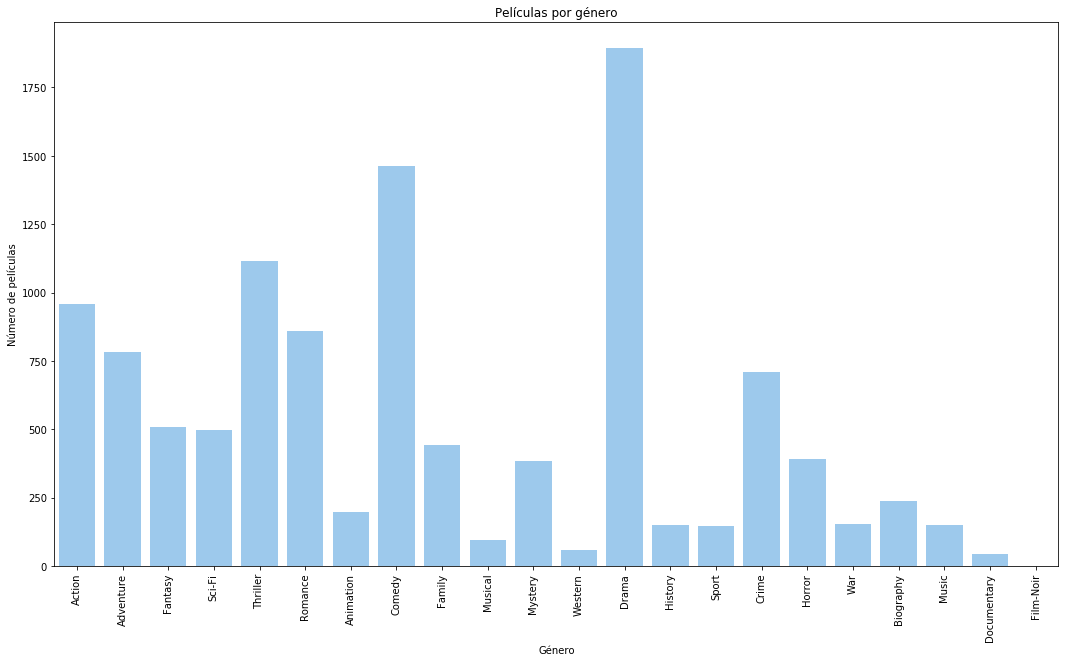

## Correlaciones

**Vamos a ver si hay algunas correlaciones interesantes entre los datos de cada película.**

**Primero, obtén las correlaciones totales del dataframe sin datos vacíos usando el [método](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) `corr()`**



,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,diff_gross,critic_ratio
num_critic_for_reviews,1.000000,0.228631,0.175128,0.252782,0.165986,0.464187,0.592473,0.236533,-0.034365,0.563684,0.104717,0.420202,0.253125,0.347886,0.180230,0.705226,0.039029,0.064497
duration,0.228631,1.000000,0.180644,0.125797,0.083632,0.245726,0.339592,0.120179,0.026919,0.351595,0.068012,-0.130211,0.128935,0.366221,0.153027,0.215303,0.008296,-0.204919
director_facebook_likes,0.175128,0.180644,1.000000,0.117405,0.089630,0.138351,0.299624,0.118547,-0.048067,0.217103,0.018167,-0.044656,0.116058,0.192314,0.037528,0.161962,0.024455,-0.085194
actor_3_facebook_likes,0.252782,0.125797,0.117405,1.000000,0.252408,0.299864,0.267762,0.489795,0.106189,0.205343,0.039966,0.117475,0.553755,0.065544,0.046356,0.271508,0.052423,-0.047523
actor_1_facebook_likes,0.165986,0.083632,0.089630,0.252408,1.000000,0.144010,0.179590,0.944813,0.057387,0.121935,0.016418,0.096194,0.391166,0.093597,0.056946,0.130300,0.027904,-0.051088
gross,0.464187,0.245726,0.138351,0.299864,0.144010,1.000000,0.624949,0.235601,-0.032025,0.544674,0.099496,0.054808,0.252842,0.214740,0.063946,0.366933,0.208033,-0.223723
num_voted_users,0.592473,0.339592,0.299624,0.267762,0.179590,0.624949,1.000000,0.249119,-0.032209,0.778881,0.065927,0.023687,0.244822,0.482430,0.084626,0.517751,0.126327,-0.263506
cast_total_facebook_likes,0.236533,0.120179,0.118547,0.489795,0.944813,0.235601,0.249119,1.000000,0.080687,0.178675,0.028682,0.127045,0.642991,0.106803,0.068952,0.205564,0.043862,-0.061839
facenumber_in_poster,-0.034365,0.026919,-0.048067,0.106189,0.057387,-0.032025,-0.032209,0.080687,1.000000,-0.080971,-0.021673,0.070093,0.073098,-0.065493,0.018988,0.015185,0.011510,0.073329
num_user_for_reviews,0.563684,0.351595,0.217103,0.205343,0.121935,0.544674,0.778881,0.178675,-0.080971,1.000000,0.070372,0.019470,0.187016,0.325003,0.098109,0.370465,0.097406,-0.374513


** Dibuja un mapa de calor que muestre de forma visual la información mostrada anteriormente. Para ello almacena en una variabl la correlacion y utiliza seaborn y su metodo para mapas de calor **

Text(0.5,1,'Correlación entre variables')

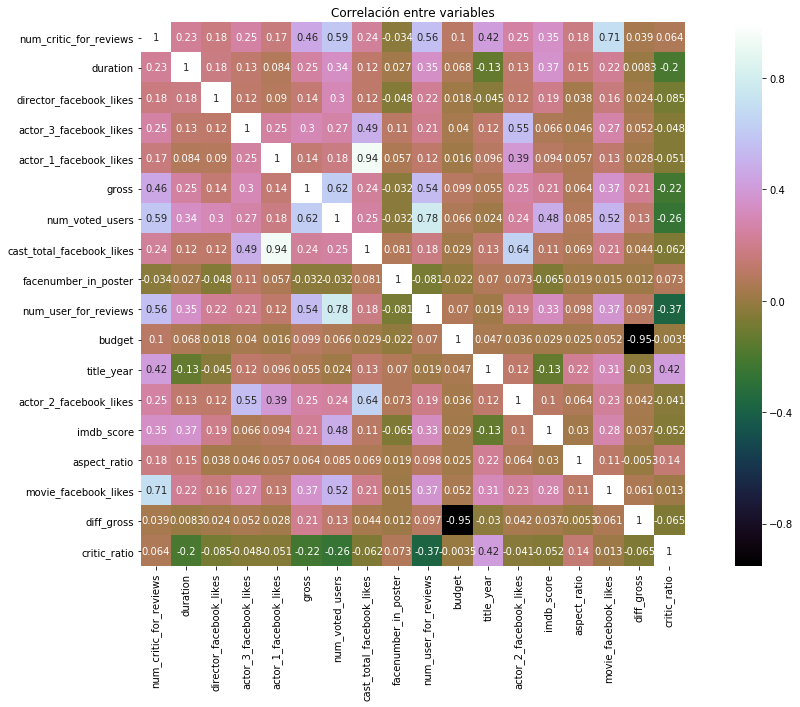

** El método [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) utiliza por defecto la correlación [Pearson](https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Pearson) o correlación lineal que da valores de -1 a +1. Experimenta con otros tipos de correlación. Examinando la tabla anterior, ¿qué conclusiones podemos extraer?**

** ¿Hay una relación directa entre los ingresos en taquilla y las críticas de profesionales? **
** ¿Existe una relación entre la duración de la película y las críticas de los usuarios? **
** ¿Hay alguna relación entre el presupuesto y los ingresos en taquilla? **

** Si quieres expón alguna conclusión mas que se te haya ocurrido al ver esta tabla**

## Palabras clave en la trama o argumento

** Vamos a realizar un pequeño estudio de las palabras clave utilizadas en el campo trama de la película (plot). Para ello tendremos que usar el paquete llamado wordcloud, tendreís que instalarlo usando **

`pip install wordcloud`

o

`conda install -c https://conda.anaconda.org/amueller wordcloud`


** NOTA: Si no conseguís instalar el paquete pasar a la siguiente sección, este ejercicio no es obligatorio pero śi interesante **

** Primero vamos a ver como es campo que contiene las palabras de la trama, es la columna `plot_keyword` **





0                  avatar|future|marine|native|paraplegic
1       goddess|marriage ceremony|marriage proposal|pi...
2                     bomb|espionage|sequel|spy|terrorist
3       deception|imprisonment|lawlessness|police offi...
4       alien|american civil war|male nipple|mars|prin...
5               sandman|spider man|symbiote|venom|villain
6       17th century|based on fairy tale|disney|flower...
7       artificial intelligence|based on comic book|ca...
8                        blood|book|love|potion|professor
9       based on comic book|batman|sequel to a reboot|...
10      crystal|epic|lex luthor|lois lane|return to earth
11      action hero|attempted rape|bond girl|official ...
12      box office hit|giant squid|heart|liar's dice|m...
13                  horse|outlaw|texas|texas ranger|train
14      based on comic book|british actor playing amer...
15      brother brother relationship|brother sister re...
16        alien invasion|assassin|battle|iron man|soldier
17            

** Como vemos se trata de un campo de palabras separadas por el carácter "|", siguiendo el mismo enfoque que usamos para obtener los genéros de las películas, deberás crear una función que obtiene un array con todas las palabras claves usadas en las tramas primero**

** Pista: Hay que tener en cuenta que el método `generate` de [Wordcloud](http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud.generate) espera un string con palabras, así que habra que pasarle un string con todas las palabras claves encontradas, da igual que estén repetidas. Es recomendable usar el [método](https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html) `np.append` ya que nos permite añadir elementos como lista al array y se añaden de forma individual **

['avatar' 'future' 'marine' ... 'date' 'four word title' 'video camera']


** Ahora que ya tenemos nuestro array con todas palabras claves, podemos crear un diagrama de palabras (tag cloud),  no pasa nada si no obtienes un diagrama exactamente igual, solo intenta concentrarte en como pasar un string al método `generate()` de Wordcloud desde el array que tenemos, igual el método nativo de string `join()` te puede ayudar en esto**

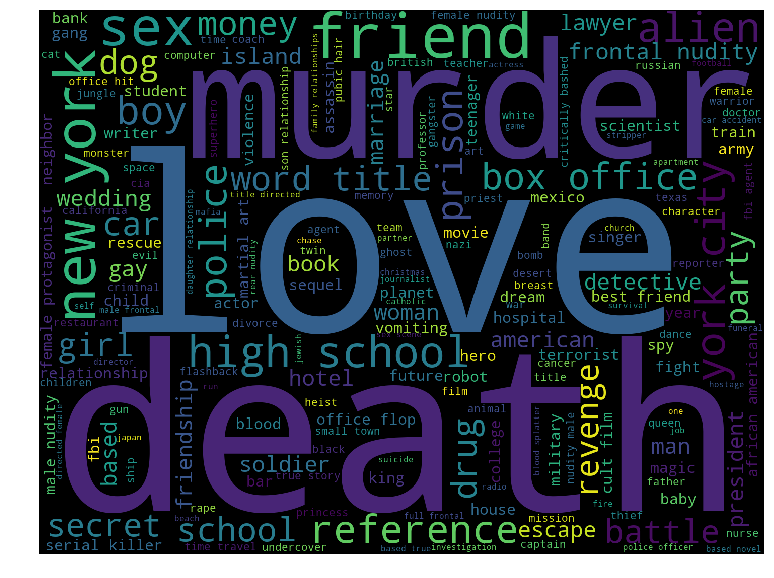

## ¡¡Buen trabajo!!